In [16]:
# Import the necessary libraries
from bertopic import BERTopic
import pandas as pd
import json

# Load the Twitter data from the JSON file
with open('./data/search_Abd Alla S/2019_03_01_0.json', 'r') as f:
    json_data = json.load(f)

print(json_data)

# Convert the JSON data into a Pandas DataFrame
df = pd.json_normalize(json_data, record_path = ['data'])
print(df['text'])

# Initialize the Bertopic model with the desired number of topics
model = BERTopic()

# Fit the model to the Twitter data
topics, probabilities = model.fit_transform(df['text'])

# Filter the DataFrame based on the topics of interest
topics_of_interest = ['gun', 'death']
mask = topics.isin(topics_of_interest).any(axis=1)
filtered_df = df[mask]

# Print the filtered DataFrame
print(filtered_df)


{'data': [{'edit_history_tweet_ids': ['1101937630143365120'], 'author_id': '20715638', 'text': "RT @FOXLA: UPDATE: The Coroner's Office has identified the man shot to death Friday outside a bank in Paramount as 38-year-old Abd Alla Tha…", 'created_at': '2019-03-02T20:09:38.000Z', 'id': '1101937630143365120'}, {'edit_history_tweet_ids': ['1101924680846303233'], 'author_id': '32547678', 'text': "UPDATE: The Coroner's Office has identified the man shot to death Friday outside a bank in Paramount as 38-year-old Abd Alla Thabet. https://t.co/cV4OLkub2Q", 'created_at': '2019-03-02T19:18:11.000Z', 'id': '1101924680846303233'}, {'edit_history_tweet_ids': ['1101924667936272384'], 'author_id': '35702257', 'text': "UPDATE: The Coroner's Office has identified the man shot to death Friday outside a bank in Paramount as 38-year-old Abd Alla Thabet. https://t.co/ua9PcIrwb9", 'created_at': '2019-03-02T19:18:08.000Z', 'id': '1101924667936272384'}, {'edit_history_tweet_ids': ['1101924655483387905'], 'au

/Users/amy.kim/opt/anaconda3/envs/twitter-env/lib/python3.9/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/Users/amy.kim/opt/anaconda3/envs/twitter-env/lib/python3.9/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [6]:
# source: https://softhints.com/merge-multiple-json-files-pandas-dataframe/
import numpy as np
import pandas as pd
import glob, os, json

json_dir = './data'
dir_list = glob.glob(os.path.join(json_dir, 'search_*'))

In [15]:
# sample data
data = { 'text': ["RT @FOXLA: UPDATE: The Coroner's Office has identified the man shot to death Friday outside a bank in Paramount as 38-year-old Abd Alla Tha…",
       "UPDATE: The Coroner's Office has identified the man shot to death Friday outside a bank in Paramount as 38-year-old Abd Alla Thabet. https://t.co/cV4OLkub2Q",
       "UPDATE: The Coroner's Office has identified the man shot to death Friday outside a bank in Paramount as 38-year-old Abd Alla Thabet. https://t.co/ua9PcIrwb9",
       "UPDATE: The Coroner's Office has identified the man shot to death Friday outside a bank in Paramount as 38-year-old Abd Alla Thabet. https://t.co/rNAs6gJ8Nn"]}
data = pd.DataFrame(data)
data = data[['text']]
data.head()

,text
0,RT @FOXLA: UPDATE: The Coroner's Office has id...
1,UPDATE: The Coroner's Office has identified th...
2,UPDATE: The Coroner's Office has identified th...
3,UPDATE: The Coroner's Office has identified th...


In [20]:
# source: https://www.kaggle.com/code/accountstatus/analysis-using-bertopic-and-sentence-transformer
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# Function to preprocess the tweets data
def preprocess_tweet_data(data,name):
    # Lowering the case of the words in the sentences
    data[name]=data[name].str.lower()
    # Code to remove the Hashtags from the text
    data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # Code to remove all the single characters in the text
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
    data[name]=data[name].apply(lambda x:re.sub('@[^\s]+','',x))

# This function is to remove stopwords from a particular column and to tokenize it
def rem_stopwords_tokenize(data,name):
    def getting(sen):
        example_sent = sen
        stop_words = set(stopwords.words('english')) 
        word_tokens = word_tokenize(example_sent) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        filtered_sentence = [] 
        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w.lower()) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

# Making a function to lemmatize all the words
lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a

# Function to make it back into a sentence 
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [21]:
# source: https://www.kaggle.com/code/accountstatus/analysis-using-bertopic-and-sentence-transformer
# Using the preprocessing function to preprocess the tweet data
print(preprocess_tweet_data(data,'text'))
# Using tokenizer and removing the stopwords
print(rem_stopwords_tokenize(data,'text'))
# Converting all the texts back to sentences
print(make_sentences(data,'text'))

None


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/amy.kim/nltk_data'
    - '/Users/amy.kim/opt/anaconda3/envs/twitter-env/nltk_data'
    - '/Users/amy.kim/opt/anaconda3/envs/twitter-env/share/nltk_data'
    - '/Users/amy.kim/opt/anaconda3/envs/twitter-env/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [2]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer, util

relevant_keywords = ['homicide', 'gun', 'shooting', 'violence', 'stab', 'rip', 'rest in peace', 'coroner', 'dead', 'body']
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')
query_embedding = model.encode(relevant_keywords)

def is_not_false_positive(text):
    passage_embedding = model.encode([text])
    similarities = util.semantic_search(query_embedding, passage_embedding, top_k = 10)
    for s in similarities:
        print(f'Top 10 most similar sentences in corpus: {}')

In [7]:
text_list = []
for directory in dir_list[:100]:
    file_list = glob.glob(os.path.join(directory, '*.json'))
    result_count = 0
    name = ""
    for file in file_list:
        f = open(file)
        js = json.load(f)
        name = file.split('/')[-2].split('search_')[-1]
        
        for tweet in js['data']:
            # if d['text'] is related to homicide, add to data, and increment result_count
            if True:
                text_list.append(d['text'])
                result_count = result_count + 1
        
        f.close()
    data_list.append({'name': name, 'result_count': result_count, 'data': text_list})

TypeError: unhashable type: 'list'

In [4]:
is_not_false_positive("RT @FOXLA: UPDATE: The Coroner's Office has identified the man shot to death Friday outside a bank in Paramount as 38-year-old Abd Alla Tha…")
# is_not_false_positive("gun")

[[{'corpus_id': 0, 'score': 0.18475370109081268}], [{'corpus_id': 0, 'score': 0.0783165767788887}], [{'corpus_id': 0, 'score': 0.14464092254638672}], [{'corpus_id': 0, 'score': 0.07483036071062088}], [{'corpus_id': 0, 'score': 0.024407191202044487}], [{'corpus_id': 0, 'score': 0.029468227177858353}], [{'corpus_id': 0, 'score': 0.02416497841477394}], [{'corpus_id': 0, 'score': 0.15990407764911652}], [{'corpus_id': 0, 'score': 0.14716145396232605}], [{'corpus_id': 0, 'score': 0.04911204054951668}]]


In [2]:
data_list = [] # list of dicts
text_list = []
for directory in dir_list:
    file_list = glob.glob(os.path.join(directory, '*.json'))
    result_count = 0
    temp = []
    name = ""
    for file in file_list:
        f = open(file) # file is a path to a json file
        js = json.load(f)
        name = file.split('/')[-2].split('search_')[-1]
        result_count = result_count + js['meta']['result_count']
        temp = np.concatenate((temp, js['data']))
        
        for d in js['data']:
            text_list.append(d['text'])
        
        f.close()
    data_list.append({'name': name, 'result_count': result_count, 'data': temp})


In [3]:
data = pd.DataFrame(data_list)
print(data.head())
print(f'data: {data.shape}')

                   name  result_count  \
0                                   0   
1  Leon Deandre Simpson             1   
2                                   0   
3                                   0   
4                                   0   

                                                data  
0                                                 []  
1  [{'text': 'Leon Deandre Simpson, 39 : #IHateTi...  
2                                                 []  
3                                                 []  
4                                                 []  
data: (5333, 3)


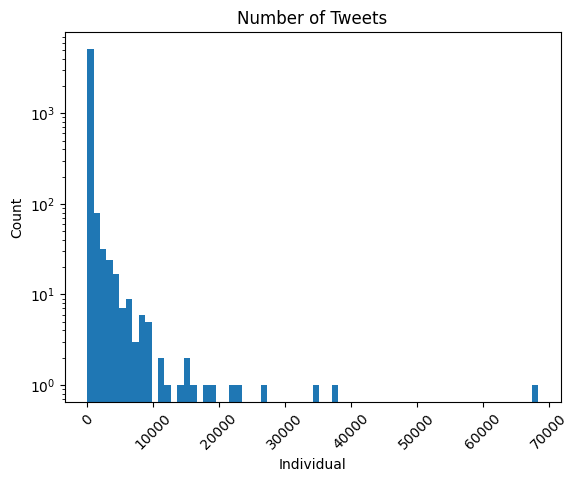

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.title('Number of Tweets')
plt.yscale('log')
plt.hist(data['result_count'], bins=70)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Individual')
plt.show()

In [5]:
data[(data['result_count'] > 3) & (data['result_count'] < 5)]

,name,result_count,data
8,Antonio Centeno Rodriguez,4,"[{'id': '1183531100062306304', 'edit_history_t..."
162,Ernesto Ramos Jimenez,4,"[{'created_at': '2020-11-21T18:32:04.000Z', 'e..."
325,Emerson Arnold,4,"[{'created_at': '2021-07-07T12:31:39.000Z', 'i..."
387,Omar Enrique Garcia,4,[{'text': 'RT @dimanche1948: Si en realidad la...
469,Dennis Todd Rogers,4,"[{'author_id': '17685447', 'text': 'Man armed ..."
...,...,...,...
4990,Jaime Garcia Jr,4,"[{'id': '1017440979513757696', 'created_at': '..."
5008,Anthony Xavier Jackson,4,"[{'id': '1465427785749450753', 'edit_history_t..."
5026,Jonathan Echevarria,4,"[{'text': 'RT @ProfHasanErkek: Şiirlerim, Ada ..."
5217,Alfred Longoria,4,"[{'created_at': '2016-01-21T20:39:45.000Z', 'a..."


In [6]:
data[data['result_count'] > 10000]

,name,result_count,data
494,Na Li,22102,"[{'created_at': '2016-07-17T19:10:52.000Z', 'a..."
621,Jose Leon,11216,"[{'created_at': '2019-03-30T02:26:15.000Z', 'a..."
691,Anthony Davis,37630,"[{'created_at': '2021-09-20T23:04:59.000Z', 'a..."
937,Jose Luis Sanchez,11132,[{'text': 'RT @SportsCenter: Why We Love Sport...
1186,Daniel Garcia,16370,"[{'author_id': '43698461', 'text': 'RT @Danspl..."
1490,Daniel Ramirez,15500,"[{'created_at': '2019-01-16T17:38:49.000Z', 't..."
1559,Jose Luis Rodriguez,18214,[{'edit_history_tweet_ids': ['1277413765613531...
1829,Gracie Anne Muehlberger,14317,"[{'created_at': '2019-11-16T21:38:22.000Z', 'e..."
2171,David Ordaz Jr,14887,"[{'author_id': '2989293426', 'text': 'RT @ceri..."
3062,Juan Cortez,68385,"[{'id': '1294768154984448002', 'edit_history_t..."


In [7]:
# text_list is a list of strings containing the text of every tweet in the data
text_list[:5]

['Leon Deandre Simpson, 39 : #IHateTimWaterman',
 '@athr9 Rubi Guerra, Renato Rodríguez, Ana Teresa Torres, Antonia Palacios, Teresa de la Parra, Israel Centeno, Ricardo Azuaje, Juan Carlos Méndez Guédez, Martha Kornblith, Manón Kübler, Juan Carlos Chirinos, Ramón Palomares, José Antonio Ramos Sucre, Yolanda Pantin... una lista al azar.',
 'RT @venepoetics: @capa1010 A quick, very incomplete &amp; very personal list:\nTeresa de la Parra, Ifigenia\nJuan Sánchez Peláez, all his poetry…',
 'RT @venepoetics: @capa1010 A quick, very incomplete &amp; very personal list:\nTeresa de la Parra, Ifigenia\nJuan Sánchez Peláez, all his poetry…',
 '@capa1010 A quick, very incomplete &amp; very personal list:\nTeresa de la Parra, Ifigenia\nJuan Sánchez Peláez, all his poetry\nJosé Antonio Ramos Sucre, all his poetry\nRenato Rodríguez, El bonche\nIsrael Centeno, Calletania\nAntonia Palacios, all of her poetry\nRómulo Gallegos, Doña Bárbara\n[...]']

In [8]:
# source: https://towardsdatascience.com/interactive-topic-modeling-with-bertopic-1ea55e7d73d8#:~:text=BERTopic%20is%20a%20topic%20modeling,words%20in%20the%20topic%20descriptions.
from bertopic import BERTopic

# testing: training model with first 100; training with the whole list takes a long time
model = BERTopic(language="multilingual")
topics, probabilities = model.fit_transform(text_list[:100])
model.get_topic_freq().head()

# ignore topic -1 (no topic assigned)


,Topic,Count
0,0,42
1,1,38
2,2,14
3,-1,6


In [7]:
# testing: results
model.get_topic(0)

[('de', 0.11884532671780546),
 ('josé', 0.06501040178010548),
 ('la', 0.06468556418734343),
 ('andrade', 0.05872103878925869),
 ('un', 0.05034009042381003),
 ('co', 0.0471776327761582),
 ('https', 0.0471776327761582),
 ('rt', 0.04717294662906443),
 ('mes', 0.03361966495826741),
 ('10', 0.03361966495826741)]

In [12]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-0.03208422 -0.4014738  -0.14802599  0.03269633 -0.05261091  0.2317966
  0.37597933 -0.04392304  0.11356918 -0.12239821  0.25837028  0.10285393
  0.2584302  -0.19025445 -0.04476992 -0.0230977   0.12181105  0.45616913
 -0.375268   -0.47375938 -0.01327184  0.1702982  -0.01580684  0.17307594
 -0.16003205  0.23108152 -0.21505097 -0.27953386  0.04778304 -0.18116157
  0.1309877   0.12336046  0.4038071   0.19686663 -0.03655086 -0.08485913
 -0.08178293  0.26823214 -0.38140795  0.23014633 -0.3951493   0.10231381
 -0.2466201   0.0455489   0.0606126  -0.20166042 -0.10318048  0.27458972
 -0.06823379 -0.00788028 -0.14816894 -0.17406893 -0.26222453  0.09016158
  0.2633843   0.19171032 -0.12514448  0.18008457 -0.25423792 -0.01264316
 -0.14854154  0.08243729 -0.17696898  0.14406177  0.43751812 -0.17437848
  0.5271314   0.13276197 -0.30573002  0.18121803 -0.0241908  -0.11894537
  0.12056322 -0.21464758 -0.12837167  0.1419

In [16]:
# source: https://www.sbert.net/docs/pretrained-models/msmarco-v3.html
model = SentenceTransformer('msmarco-distilbert-base-tas-b')

query_embedding = model.encode('How big is London')
passage_embedding = model.encode('London has 9,787,426 inhabitants at the 2011 census')

print("Similarity:", util.cos_sim(query_embedding, passage_embedding))

Similarity: tensor([[0.8748]])


In [17]:
relevant_keywords = ['homicide', 'gun', 'shooting', 'violence', 'stab', 'rip', 'rest in peace', 'coroner', 'dead', 'body']

model = SentenceTransformer('msmarco-distilbert-base-tas-b')

query_embedding = model.encode(relevant_keywords)
passage_embedding = model.encode(text_list[:100])

print("Similarity:", util.cos_sim(query_embedding, passage_embedding))

Similarity: tensor([[0.6988, 0.6402, 0.6098, 0.6098, 0.6001, 0.6394, 0.6394, 0.6394, 0.6394,
         0.6394, 0.6394, 0.6394, 0.6394, 0.6394, 0.6390, 0.6394, 0.6394, 0.6394,
         0.6394, 0.6394, 0.6394, 0.6394, 0.6394, 0.6394, 0.6394, 0.6394, 0.6394,
         0.6394, 0.6394, 0.6394, 0.6394, 0.6394, 0.6394, 0.6394, 0.6211, 0.6601,
         0.6153, 0.6601, 0.6601, 0.6601, 0.6686, 0.6540, 0.6202, 0.6202, 0.6634,
         0.6367, 0.6202, 0.6649, 0.6252, 0.6682, 0.6367, 0.6542, 0.6693, 0.6569,
         0.6367, 0.6137, 0.6367, 0.6367, 0.6652, 0.6204, 0.6496, 0.6583, 0.6252,
         0.6122, 0.6252, 0.6281, 0.6252, 0.6019, 0.6202, 0.6054, 0.6204, 0.5876,
         0.6202, 0.6202, 0.5876, 0.6545, 0.6202, 0.6171, 0.6054, 0.6569, 0.6569,
         0.6569, 0.6569, 0.6179, 0.6569, 0.6569, 0.6540, 0.6129, 0.5876, 0.6204,
         0.6313, 0.6308, 0.6202, 0.6017, 0.6329, 0.6202, 0.6151, 0.6532, 0.6265,
         0.6232],
        [0.6418, 0.6399, 0.6000, 0.6000, 0.5857, 0.6186, 0.6186, 0.6186, 0.6186

In [18]:
# multilingual
embedder = SentenceTransformer('distiluse-base-multilingual-cased-v1')
embeddings = embedder.encode(['Hello World', 'Hallo Welt', 'Hola mundo'])
print(embeddings)


[[ 0.03346376  0.00484747 -0.04678714 ...  0.01511979 -0.03623774
  -0.0632317 ]
 [ 0.04559845  0.01505487 -0.05186233 ...  0.00402888 -0.0300804
  -0.05890043]
 [ 0.05262217  0.03586335 -0.05460797 ... -0.02830481 -0.05466486
  -0.02503219]]
